In [ ]:
# History
# Name      Date          Description                   Issue
# Bofan     Nov 20        upload and load dataset.      file too large to load and causing crash
# Emanuel   Dec 1         removing reviews stopwords    

# 1. Preprocessing  dataset

In [ ]:
# Preprocess data: removing irrelevant features
# Includes: tokenization, case-folding, stopword removal, stem words, weight words
# Includes: tokenization, case-folding, stop word removal
# Return a ranked list of reviews 

# dataset download link: https://jmcauley.ucsd.edu/data/amazon_v2/index.html
# example name is sport and oudoor

## Bofan      load dataset

In [1]:
from os import path
import os
import pandas as pd
import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt


In [2]:
# B
# dataset web address https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Sports_and_Outdoors.json.gz

location = 'data/'
chunklocation = 'chunkdata/chunk'
path = 'Sports_and_Outdoors.json'
#pathgz = 'Sports_and_Outdoors.json.gz' 
# sample = 'sample'
# file location and name

#filenamegz = location+pathgz
filename = location + path
chunkpath = location + chunklocation

print(filename)
print(chunkpath)

data/Sports_and_Outdoors.json
data/chunkdata/chunk


In [3]:
# os.mkdir('data/chunkdata')


In [4]:
print(chunkpath+str(0)+'.csv')

data/chunkdata/chunk0.csv


#### generate a smaller chunk dataset for futrue use

In [6]:
# generate sample data

#filename = location+path
#samplepath = location+sample

# for i in chunks:
#   df = i
#   break
# # save to sample.csv in data folder
# df.to_csv(samplepath)


In [ ]:
# generate a smaller chunk dataset for futrue use
import pandas as pd


def sampledata(filename,chunkpath, chunksize):
  chunks = pd.read_json(filename, lines=True, chunksize = chunksize)
  i=0
  for c in chunks:
      #print(c)
      i += 1
      print(i,"th of",str(chunksize))
      c.to_csv(chunkpath+str(i)+'.csv')
      

# sampledata(filename,chunkpath, chunksize = 10**5)

#### read df

In [7]:
list_of_files = os.listdir('data/chunkdata/')
print(list_of_files)

['chunk1.csv', 'chunk2.csv', 'chunk3.csv', 'chunk4.csv', 'chunk5.csv', 'chunk6.csv', 'chunk7.csv', 'chunk8.csv', 'chunk9.csv', 'chunk10.csv', 'chunk11.csv', 'chunk12.csv', 'chunk13.csv', 'chunk14.csv', 'chunk15.csv', 'chunk16.csv', 'chunk17.csv', 'chunk18.csv', 'chunk19.csv', 'chunk20.csv', 'chunk21.csv', 'chunk22.csv', 'chunk23.csv', 'chunk24.csv', 'chunk25.csv', 'chunk26.csv', 'chunk27.csv', 'chunk28.csv', 'chunk29.csv', 'chunk30.csv', 'chunk31.csv', 'chunk32.csv', 'chunk33.csv', 'chunk34.csv', 'chunk35.csv', 'chunk36.csv', 'chunk37.csv', 'chunk38.csv', 'chunk39.csv', 'chunk40.csv', 'chunk41.csv', 'chunk42.csv', 'chunk43.csv', 'chunk44.csv', 'chunk45.csv', 'chunk46.csv', 'chunk47.csv', 'chunk48.csv', 'chunk49.csv', 'chunk50.csv', 'chunk51.csv', 'chunk52.csv', 'chunk53.csv', 'chunk54.csv', 'chunk55.csv', 'chunk56.csv', 'chunk57.csv', 'chunk58.csv', 'chunk59.csv', 'chunk60.csv', 'chunk61.csv', 'chunk62.csv', 'chunk63.csv', 'chunk64.csv', 'chunk65.csv', 'chunk66.csv', 'chunk67.csv', 'ch

In [8]:
def printdfsize(df):  # get data frame size by compute row * col
    row, col = df.shape
    print('df size', row * col)



# read and load sample.csv data
df = pd.read_csv('data/chunkdata/chunk1.csv', low_memory=False)
print('#'*20,  'dataset load in shape')
print(df.shape)

printdfsize(df)

# print(df.head())
print( '#'*20, 'column names')
print(list(df.columns))
# msno.matrix(df)

df = df.drop(columns=['Unnamed: 0','vote', 'image','style','reviewTime','reviewerName','Unnamed: 0'])
df = df.dropna()
print('#'* 20, 'shape after first drop')
print(df.shape)
printdfsize(df)

print('#'* 20, 'shape after drop false verified')
df = df[df.verified == True]
df = df.drop(columns=['verified'])
print(df.shape)
printdfsize(df)
# print(list(df.columns))
# df.head()
# df['overall'].value_counts()

# remove rows that has overall rate lower than 4 
ratestd = 4
df = df[df.overall > ratestd-1]
print('#'* 20, 'df shape after filtering rate lower than',str(ratestd),'is')
print( df.shape)
printdfsize(df)
df.head()




#################### dataset load in shape
(100000, 13)
df size 1300000
#################### column names
['Unnamed: 0', 'overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote', 'style', 'image']
#################### shape after first drop
(99938, 7)
df size 699566
#################### shape after drop false verified
(89395, 6)
df size 536370
#################### df shape after filtering rate lower than 4 is
(74920, 6)
df size 449520


,overall,reviewerID,asin,reviewText,summary,unixReviewTime
1,4,A2681T699HV6H1,0000031895,very cute and went great with my Halloween cos...,loved it!,1384905600
3,5,A14PVW2N5YBWSA,0000031895,cute,Five Stars,1476748800
5,5,A2WGRWA7BDPF7F,0000031895,My daughter loved it.,Five Stars,1474156800
13,4,A1LWUYAJMHBXEF,0000031895,Great fit for my 6 year old,Four Stars,1436745600
14,5,A26S8PJSPL77M2,0000031895,My grand daughter loved this tutu and danced a...,Tutu,1422835200


Text(0.5, 0, "product's ASIN")

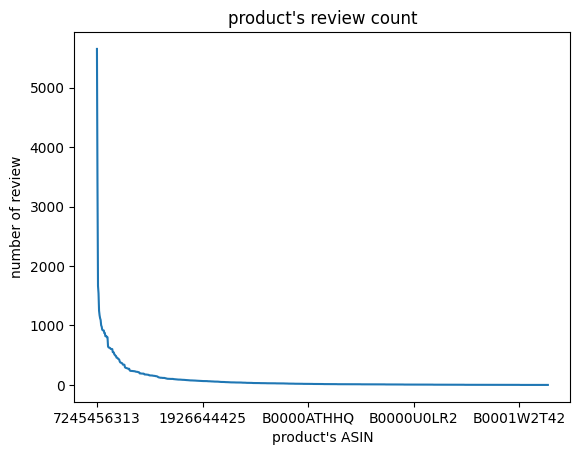

In [44]:
# df['asin'].value_counts()
df['asin'].value_counts().plot()
plt.title('product\'s review count')
plt.ylabel('number of review')
plt.xlabel('product\'s ASIN')

In [11]:
asin = df['asin'].value_counts()
asin = asin.to_frame()
# asinlist= asin.index[asin['asin'] >500].tolist()
# asinlist

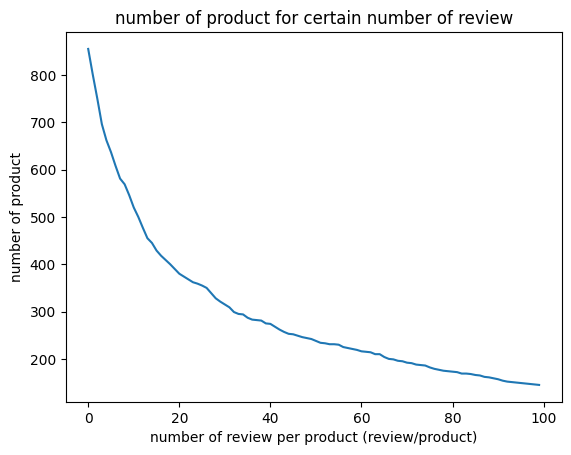

In [45]:
def createasinlist(numbersofreviews):
    asincount = list()
    for i in range(numbersofreviews):
        asinlist= asin.index[asin['asin'] >i].tolist()
        a = len(asinlist)
        asincount.append(a)
    plt.plot(asincount)
    plt.title('number of product for certain number of review')
    plt.ylabel('number of product')
    plt.xlabel('number of review per product (review/product)')
    return asincount

asinlist = createasinlist(100)


In [46]:
asinlist

[855,
 801,
 750,
 696,
 662,
 637,
 608,
 581,
 569,
 546,
 520,
 500,
 477,
 455,
 445,
 429,
 418,
 409,
 400,
 390,
 380,
 374,
 368,
 362,
 359,
 355,
 350,
 339,
 328,
 321,
 315,
 309,
 299,
 295,
 294,
 287,
 283,
 282,
 281,
 275,
 274,
 268,
 262,
 257,
 253,
 252,
 249,
 246,
 244,
 242,
 238,
 234,
 233,
 231,
 231,
 230,
 225,
 223,
 221,
 219,
 216,
 215,
 214,
 210,
 210,
 204,
 200,
 199,
 196,
 195,
 192,
 191,
 188,
 187,
 186,
 182,
 179,
 177,
 175,
 174,
 173,
 172,
 169,
 169,
 168,
 166,
 165,
 162,
 161,
 159,
 157,
 154,
 152,
 151,
 150,
 149,
 148,
 147,
 146,
 145]

In [149]:
df['asin'].value_counts()

7245456313    5649
B00008BFYG    3392
B00004TBLW    1665
B00012M5MS    1539
B0000DZFXZ    1247
              ... 
B0000D9GZA       1
B00019JKAQ       1
B0001IXGLG       1
B0000DYO5Y       1
B0000A0AFN       1
Name: asin, Length: 855, dtype: int64

### E